In [2]:
import pandas as pd
# Cargar los datos
data= pd.read_csv('prueba_piloto2.csv', encoding='latin-1')  # Se especifica la codificación latin-1
data.head()  # Ver las primeras filas del dataset

,Rol,Género,Edad,Años en la institución,Área o Departamento,Carrera,Ambiente seguro,Testigo de violencia,Frecuencia de violencia,Violencia fí1ca,Acoso sexual,Violencia verbal,Reporte incidente,Acción de la institución,Programas preventivos,Más medidas de seguridad,Desvalorización de su trabajo,Sobrecarga intencional de trabajos,difamación dentro de la institución,humillación pública
0,1,1,1,3,4,1,2,1,3,2,1,1,2,0,3,1,1,2,1,1
1,1,2,1,2,4,7,1,1,4,1,1,1,2,0,3,2,1,2,1,1
2,1,2,1,1,4,7,2,1,3,2,2,2,2,0,1,1,2,2,2,1
3,1,1,1,2,4,5,1,1,3,1,2,1,1,2,3,1,1,2,1,2
4,2,2,3,4,3,11,1,1,4,1,2,2,1,1,1,1,2,1,2,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear una nueva variable binaria que combine todas las formas de violencia
data['Violencia_general'] = (
    (data['Violencia fí1ca'] == 1) |
    (data['Acoso sexual'] == 1) |
    (data['Violencia verbal'] == 1) |
    (data[' difamación dentro de la institución'] == 1) |
    (data['humillación pública'] == 1) |
    (data['Desvalorización de su trabajo'] == 1) |
    (data['Sobrecarga intencional de trabajos'] == 1)
).astype(int)

# Eliminar las columnas de violencia individuales y usar "Violencia_general" como objetivo
X = data.drop(columns=['Violencia fí1ca', 'Violencia_general'])
y = data['Violencia_general']

# Dividir en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Cambiar la forma de los datos para LSTM: (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Crear el modelo LSTM
model_lstm = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Hacer predicciones
y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype("int32")

# Calcular las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
roc_auc_lstm = roc_auc_score(y_test, y_pred_lstm)

# Mostrar los resultados
print(f"Accuracy: {accuracy_lstm}")
print(f"Precision: {precision_lstm}")
print(f"Recall: {recall_lstm}")
print(f"F1-Score: {f1_lstm}")
print(f"AUC-ROC: {roc_auc_lstm}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.6711 - loss: 0.6672 - val_accuracy: 0.9773 - val_loss: 0.3630
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9787 - loss: 0.1833 - val_accuracy: 0.9773 - val_loss: 0.1285
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9811 - loss: 0.1076 - val_accuracy: 0.9773 - val_loss: 0.1067
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9855 - loss: 0.0758 - val_accuracy: 0.9773 - val_loss: 0.1044
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9885 - loss: 0.0610 - val_accuracy: 0.9773 - val_loss: 0.1022
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9885 - loss: 0.0598 - val_accuracy: 0.9773 - val_loss: 0.1046
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9819 - loss: 0.0796 - val_accuracy: 0.9773 - val_loss: 0.1040
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9903 - loss: 0.0459 - val_accuracy: 0.9773 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


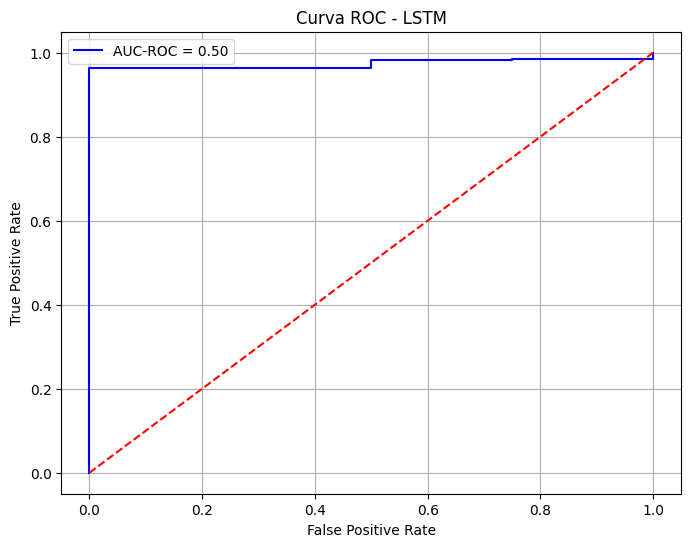

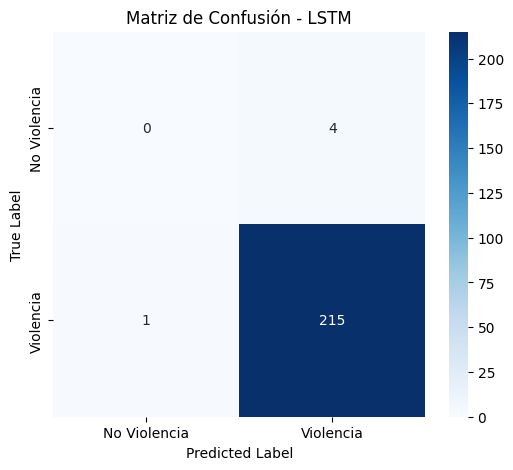

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix
import seaborn as sns

# PASO 1: Generar la Curva ROC
# Calcular la probabilidad de predicción para la curva ROC
y_pred_prob_lstm = model_lstm.predict(X_test_lstm)

# Obtener los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lstm)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {roc_auc_lstm:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - LSTM')
plt.legend()
plt.grid(True)
plt.show()

# PASO 2: Generar la Matriz de Confusión
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_lstm)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Violencia', 'Violencia'], yticklabels=['No Violencia', 'Violencia'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusión - LSTM')
plt.show()

